## Data Cleaning and Preprocessing ##

After getting our movie_data.csv many edits were needed. 
1. We needed to split the gross into domestic and world wide
2. We needed to format the date into a separate month and year column.
    -we needed to also separate out the random title values in the release date column.
    -decide wether to drop or append these wrong values. 
3. Change budget to an integer after stripping the dollar sign. 
4. Limit genres to 1 genre for plotting.
5. Decide wether or not to keep the budget column as only ~600 had values provided.

In [1]:
# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# math and df manipulation libraries
import pandas as pd
import numpy as np
import math
import time
import re
import requests
import sys
import json
import ast

In [2]:
#Importing CSV for data, this is the data our visualizations are based on
movie_df = pd.read_csv('movie_data_excel.csv', index_col = 0)
# movie_df2 = pd.read_csv('movie_data.csv', index_col=0)

In [3]:
movie_df


,title,release_date,genres,mpaa,budget_cost,total_gross,runtime
0,Finding Dory,17-Jun-16,"['Adventure', 'Animation', 'Comedy', 'Family']",PG,NaN,"{'domestic_gross': 486295561, 'worldwide_gross...",1 hr 37 min
1,Rogue One: A Star Wars Story,16-Dec-16,"['Action', 'Adventure', 'Sci-Fi']",PG-13,"$200,000,000","{'domestic_gross': 532177324, 'worldwide_gross...",2 hr 13 min
2,Captain America: Civil War,6-May-16,"['Action', 'Adventure', 'Sci-Fi']",PG-13,"$250,000,000","{'domestic_gross': 408084349, 'worldwide_gross...",2 hr 27 min
3,The Secret Life of Pets,8-Jul-16,"['Adventure', 'Animation', 'Comedy', 'Family']",PG,"$75,000,000","{'domestic_gross': 368384330, 'worldwide_gross...",1 hr 27 min
4,The Jungle Book,15-Apr-16,"['Adventure', 'Drama', 'Family', 'Fantasy']",PG,"$175,000,000","{'domestic_gross': 364001123, 'worldwide_gross...",1 hr 46 min
...,...,...,...,...,...,...,...
3872,I Do Not Care If We Go Down in History as Barb...,19-Jul-19,"['Comedy', 'Drama']",NaN,NaN,"{'domestic_gross': 11307, 'worldwide_gross': 3...",2 hr 20 min
3873,The Load,30-Aug-19,['Drama'],NaN,NaN,"{'domestic_gross': 28410, 'worldwide_gross': 2...",1 hr 38 min
3874,Asako I & II,17-May-19,"['Drama', 'Romance']",NaN,NaN,"{'domestic_gross': 25559, 'worldwide_gross': 6...",1 hr 59 min
3875,Chained for Life,13-Sep-19,['Drama'],NaN,NaN,"{'domestic_gross': 17431, 'worldwide_gross': 1...",1 hr 31 min


In [4]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3877 entries, 0 to 3876
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         3877 non-null   object
 1   release_date  3876 non-null   object
 2   genres        3877 non-null   object
 3   mpaa          1807 non-null   object
 4   budget_cost   635 non-null    object
 5   total_gross   3877 non-null   object
 6   runtime       3834 non-null   object
dtypes: object(7)
memory usage: 242.3+ KB


In [5]:
# first, we want to change every date to str type
# we want to split the date on '-' then create a column to show month as first index
# create a column to show year as last index of the splitted release_date

movie_df['release_date'] = movie_df.release_date.astype(str)
movie_df['release_month'] = movie_df['release_date'].apply(lambda x: x.split('-')[1] if len(x.split('-')) == 3 else float('NaN'))
movie_df['release_year'] = movie_df['release_date'].apply(lambda x: x.split('-')[-1] if len(x.split('-')) == 3 else float('NaN'))
# movie_df['release_date'] = movie_df['release_date'].apply(lambda x: f'{x.split}')
movie_df

,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year
0,Finding Dory,17-Jun-16,"['Adventure', 'Animation', 'Comedy', 'Family']",PG,NaN,"{'domestic_gross': 486295561, 'worldwide_gross...",1 hr 37 min,Jun,16
1,Rogue One: A Star Wars Story,16-Dec-16,"['Action', 'Adventure', 'Sci-Fi']",PG-13,"$200,000,000","{'domestic_gross': 532177324, 'worldwide_gross...",2 hr 13 min,Dec,16
2,Captain America: Civil War,6-May-16,"['Action', 'Adventure', 'Sci-Fi']",PG-13,"$250,000,000","{'domestic_gross': 408084349, 'worldwide_gross...",2 hr 27 min,May,16
3,The Secret Life of Pets,8-Jul-16,"['Adventure', 'Animation', 'Comedy', 'Family']",PG,"$75,000,000","{'domestic_gross': 368384330, 'worldwide_gross...",1 hr 27 min,Jul,16
4,The Jungle Book,15-Apr-16,"['Adventure', 'Drama', 'Family', 'Fantasy']",PG,"$175,000,000","{'domestic_gross': 364001123, 'worldwide_gross...",1 hr 46 min,Apr,16
...,...,...,...,...,...,...,...,...,...
3872,I Do Not Care If We Go Down in History as Barb...,19-Jul-19,"['Comedy', 'Drama']",NaN,NaN,"{'domestic_gross': 11307, 'worldwide_gross': 3...",2 hr 20 min,Jul,19
3873,The Load,30-Aug-19,['Drama'],NaN,NaN,"{'domestic_gross': 28410, 'worldwide_gross': 2...",1 hr 38 min,Aug,19
3874,Asako I & II,17-May-19,"['Drama', 'Romance']",NaN,NaN,"{'domestic_gross': 25559, 'worldwide_gross': 6...",1 hr 59 min,May,19
3875,Chained for Life,13-Sep-19,['Drama'],NaN,NaN,"{'domestic_gross': 17431, 'worldwide_gross': 1...",1 hr 31 min,Sep,19


In [6]:
movie_df

,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year
0,Finding Dory,17-Jun-16,"['Adventure', 'Animation', 'Comedy', 'Family']",PG,NaN,"{'domestic_gross': 486295561, 'worldwide_gross...",1 hr 37 min,Jun,16
1,Rogue One: A Star Wars Story,16-Dec-16,"['Action', 'Adventure', 'Sci-Fi']",PG-13,"$200,000,000","{'domestic_gross': 532177324, 'worldwide_gross...",2 hr 13 min,Dec,16
2,Captain America: Civil War,6-May-16,"['Action', 'Adventure', 'Sci-Fi']",PG-13,"$250,000,000","{'domestic_gross': 408084349, 'worldwide_gross...",2 hr 27 min,May,16
3,The Secret Life of Pets,8-Jul-16,"['Adventure', 'Animation', 'Comedy', 'Family']",PG,"$75,000,000","{'domestic_gross': 368384330, 'worldwide_gross...",1 hr 27 min,Jul,16
4,The Jungle Book,15-Apr-16,"['Adventure', 'Drama', 'Family', 'Fantasy']",PG,"$175,000,000","{'domestic_gross': 364001123, 'worldwide_gross...",1 hr 46 min,Apr,16
...,...,...,...,...,...,...,...,...,...
3872,I Do Not Care If We Go Down in History as Barb...,19-Jul-19,"['Comedy', 'Drama']",NaN,NaN,"{'domestic_gross': 11307, 'worldwide_gross': 3...",2 hr 20 min,Jul,19
3873,The Load,30-Aug-19,['Drama'],NaN,NaN,"{'domestic_gross': 28410, 'worldwide_gross': 2...",1 hr 38 min,Aug,19
3874,Asako I & II,17-May-19,"['Drama', 'Romance']",NaN,NaN,"{'domestic_gross': 25559, 'worldwide_gross': 6...",1 hr 59 min,May,19
3875,Chained for Life,13-Sep-19,['Drama'],NaN,NaN,"{'domestic_gross': 17431, 'worldwide_gross': 1...",1 hr 31 min,Sep,19


In [7]:
# next we need the worldwide gross and domestic gross from the dictionary keys and values of total gross 
# converting str type to numerical
# we made this a new column

movie_df['world_gross'] = movie_df['total_gross'].apply(lambda x: ast.literal_eval(x)['worldwide_gross'])
movie_df['domestic_gross'] = movie_df['total_gross'].apply(lambda x: ast.literal_eval(x)['domestic_gross'])

In [8]:
movie_df

,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross
0,Finding Dory,17-Jun-16,"['Adventure', 'Animation', 'Comedy', 'Family']",PG,NaN,"{'domestic_gross': 486295561, 'worldwide_gross...",1 hr 37 min,Jun,16,1028570889,486295561
1,Rogue One: A Star Wars Story,16-Dec-16,"['Action', 'Adventure', 'Sci-Fi']",PG-13,"$200,000,000","{'domestic_gross': 532177324, 'worldwide_gross...",2 hr 13 min,Dec,16,1056057273,532177324
2,Captain America: Civil War,6-May-16,"['Action', 'Adventure', 'Sci-Fi']",PG-13,"$250,000,000","{'domestic_gross': 408084349, 'worldwide_gross...",2 hr 27 min,May,16,1153296293,408084349
3,The Secret Life of Pets,8-Jul-16,"['Adventure', 'Animation', 'Comedy', 'Family']",PG,"$75,000,000","{'domestic_gross': 368384330, 'worldwide_gross...",1 hr 27 min,Jul,16,875457937,368384330
4,The Jungle Book,15-Apr-16,"['Adventure', 'Drama', 'Family', 'Fantasy']",PG,"$175,000,000","{'domestic_gross': 364001123, 'worldwide_gross...",1 hr 46 min,Apr,16,966550600,364001123
...,...,...,...,...,...,...,...,...,...,...,...
3872,I Do Not Care If We Go Down in History as Barb...,19-Jul-19,"['Comedy', 'Drama']",NaN,NaN,"{'domestic_gross': 11307, 'worldwide_gross': 3...",2 hr 20 min,Jul,19,39171,11307
3873,The Load,30-Aug-19,['Drama'],NaN,NaN,"{'domestic_gross': 28410, 'worldwide_gross': 2...",1 hr 38 min,Aug,19,28410,28410
3874,Asako I & II,17-May-19,"['Drama', 'Romance']",NaN,NaN,"{'domestic_gross': 25559, 'worldwide_gross': 6...",1 hr 59 min,May,19,627102,25559
3875,Chained for Life,13-Sep-19,['Drama'],NaN,NaN,"{'domestic_gross': 17431, 'worldwide_gross': 1...",1 hr 31 min,Sep,19,17431,17431


In [9]:
movie_df['budget_cost'] = movie_df.budget_cost.astype(str)
movie_df['budget_cost'] = movie_df['budget_cost'].apply(lambda x: x.replace('$', '').replace(',',''))
movie_df

,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross
0,Finding Dory,17-Jun-16,"['Adventure', 'Animation', 'Comedy', 'Family']",PG,nan,"{'domestic_gross': 486295561, 'worldwide_gross...",1 hr 37 min,Jun,16,1028570889,486295561
1,Rogue One: A Star Wars Story,16-Dec-16,"['Action', 'Adventure', 'Sci-Fi']",PG-13,200000000,"{'domestic_gross': 532177324, 'worldwide_gross...",2 hr 13 min,Dec,16,1056057273,532177324
2,Captain America: Civil War,6-May-16,"['Action', 'Adventure', 'Sci-Fi']",PG-13,250000000,"{'domestic_gross': 408084349, 'worldwide_gross...",2 hr 27 min,May,16,1153296293,408084349
3,The Secret Life of Pets,8-Jul-16,"['Adventure', 'Animation', 'Comedy', 'Family']",PG,75000000,"{'domestic_gross': 368384330, 'worldwide_gross...",1 hr 27 min,Jul,16,875457937,368384330
4,The Jungle Book,15-Apr-16,"['Adventure', 'Drama', 'Family', 'Fantasy']",PG,175000000,"{'domestic_gross': 364001123, 'worldwide_gross...",1 hr 46 min,Apr,16,966550600,364001123
...,...,...,...,...,...,...,...,...,...,...,...
3872,I Do Not Care If We Go Down in History as Barb...,19-Jul-19,"['Comedy', 'Drama']",NaN,nan,"{'domestic_gross': 11307, 'worldwide_gross': 3...",2 hr 20 min,Jul,19,39171,11307
3873,The Load,30-Aug-19,['Drama'],NaN,nan,"{'domestic_gross': 28410, 'worldwide_gross': 2...",1 hr 38 min,Aug,19,28410,28410
3874,Asako I & II,17-May-19,"['Drama', 'Romance']",NaN,nan,"{'domestic_gross': 25559, 'worldwide_gross': 6...",1 hr 59 min,May,19,627102,25559
3875,Chained for Life,13-Sep-19,['Drama'],NaN,nan,"{'domestic_gross': 17431, 'worldwide_gross': 1...",1 hr 31 min,Sep,19,17431,17431


In [10]:
# a preview 
movie_df.head()

,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross
0,Finding Dory,17-Jun-16,"['Adventure', 'Animation', 'Comedy', 'Family']",PG,nan,"{'domestic_gross': 486295561, 'worldwide_gross...",1 hr 37 min,Jun,16,1028570889,486295561
1,Rogue One: A Star Wars Story,16-Dec-16,"['Action', 'Adventure', 'Sci-Fi']",PG-13,200000000,"{'domestic_gross': 532177324, 'worldwide_gross...",2 hr 13 min,Dec,16,1056057273,532177324
2,Captain America: Civil War,6-May-16,"['Action', 'Adventure', 'Sci-Fi']",PG-13,250000000,"{'domestic_gross': 408084349, 'worldwide_gross...",2 hr 27 min,May,16,1153296293,408084349
3,The Secret Life of Pets,8-Jul-16,"['Adventure', 'Animation', 'Comedy', 'Family']",PG,75000000,"{'domestic_gross': 368384330, 'worldwide_gross...",1 hr 27 min,Jul,16,875457937,368384330
4,The Jungle Book,15-Apr-16,"['Adventure', 'Drama', 'Family', 'Fantasy']",PG,175000000,"{'domestic_gross': 364001123, 'worldwide_gross...",1 hr 46 min,Apr,16,966550600,364001123


In [11]:
#see the unique values of the release_month
movie_df['release_month'].unique()


array(['Jun', 'Dec', 'May', 'Jul', 'Apr', 'Feb', 'Mar', 'Aug', 'Nov',
       'Jan', 'Sep', 'Oct', nan], dtype=object)

In [12]:
#below are all the wrong values that had dates we did want to keep. 

#display(movie_df[movie_df['release_date'] == 'Kalyana']) # 'September 1, 2017' 
#display(movie_df[movie_df['release_month'] == 'Rocky']) #May 5 2017
#display(movie_df[movie_df['release_month'] == 'Psycho']) #October 13, 2017
#display(movie_df[movie_df['release_month'] == 'Live']) # Nov 2, 2018
#display(movie_df[movie_df['release_month'] == 'Mamma']) #Jul 20, 2018
#display(movie_df[movie_df['release_month'] == 'The']) #Nov 8, 2019 doubled delete 3752, The Jesus Rolls Feb 28, 2020
#display(movie_df[movie_df['release_month'] == 'Gigi']) #Jun 29, 2018
#display(movie_df[movie_df['release_month'] == 'Jumanji']) #December 20, 2017
#display(movie_df[movie_df['release_month'] == 'Harold']) #September 7, 2018
#display(movie_df[movie_df['release_month'] == 'Avengers:']) # Avengers Endgame Apr 26, 2019 and Spider Man Far from Home Jul 2, 2019
#display(movie_df[movie_df['release_month'] == 'nan']) #Feb 25, 2013






In [13]:
# I appended all of these manually with data from the original scrape site of Box office Mojo
# movie_df[movie_df['release_month'] == 'Rocky'] #May 5 2017
movie_df.loc[1205, 'release_date'] # = 'May 5, 2017'

'5-May-17'

In [14]:
#movie_df.loc[1205]

In [15]:
#(movie_df[movie_df['release_month'] == 'Psycho']) #October 13, 2017
#movie_df.loc[1391, 'release_date'] = 'October 13, 2017'

In [16]:
#movie_df.loc[1391]

In [17]:
#changed date and deleted repeated data
#(movie_df[movie_df['release_month'] == 'Live']) # Nov 2, 2018
#movie_df.loc[1721, 'release_date'] = 'November 2, 2018'
#movie_df.drop(2788, axis = 0, inplace = True)

In [18]:
#movie_df.loc[1721]

In [19]:
#(movie_df[movie_df['release_month'] == 'Mamma']) #Jul 20, 2018
#movie_df.loc[1732, 'release_date'] = 'July 20, 2018'


In [20]:
#movie_df.loc[1732]

In [21]:
#(movie_df[movie_df['release_month'] == 'Gigi']) #Jun 29, 2018
#(movie_df[movie_df['release_month'] == 'Jumanji']) #December 20, 2017
#(movie_df[movie_df['release_month'] == 'Harold']) #September 7, 2018
#(movie_df[movie_df['release_month'] == 'Avengers:']) # Avengers Endgame Apr 26, 2019 and Spider Man Far from Home Jul 2, 2019
#(movie_df[movie_df['release_month'] == 'nan']) #Feb 25, 2013




In [22]:
#we re-ran this code from the start to reformat all the dates that we appended into the year and month columns
movie_df[movie_df['release_month'] == 'Gigi'] #Jun 29, 2018
# movie_df.loc[2252, 'release_date'] = '29-Jun-18'

,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross


In [23]:
movie_df[movie_df['release_month'] == 'Jumanji'] #December 20, 2017
# movie_df.loc[2362, 'release_date'] = '17-Dec-20'


,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross


In [24]:
movie_df[movie_df['release_month'] == 'Harold'] #September 7, 2018
# movie_df.loc[2363, 'release_date'] = '7-Sep-18'

,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross


In [25]:
(movie_df[movie_df['release_month'] == 'Avengers:']) # Avengers Endgame Apr 26, 2019 and Spider Man Far from Home Jul 2, 2019
# movie_df.loc[2701, 'release_date'] = '26-Apr-19'
# movie_df.loc[2707, 'release_date'] = '2-Jul-19'

,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross


In [26]:
movie_df.loc[2707]

title                                     Spider-Man: Far from Home
release_date                                               2-Jul-19
genres                            ['Action', 'Adventure', 'Sci-Fi']
mpaa                                                          PG-13
budget_cost                                              160000000 
total_gross       {'domestic_gross': 390532085, 'worldwide_gross...
runtime                                                  2 hr 9 min
release_month                                                   Jul
release_year                                                     19
world_gross                                              1131927996
domestic_gross                                            390532085
Name: 2707, dtype: object

In [27]:
(movie_df[movie_df['release_month'] == 'nan']) #Aug 23 2018
# movie_df.loc[3818, 'release_date'] = 'August 23, 2018'

,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross


In [28]:
movie_df.loc[3818]

title                                                       Circles
release_date                                                    nan
genres                                     ['Documentary', 'Drama']
mpaa                                                            NaN
budget_cost                                                     nan
total_gross       {'domestic_gross': 10260, 'worldwide_gross': 1...
runtime                                                 1 hr 22 min
release_month                                                   NaN
release_year                                                    NaN
world_gross                                                   10260
domestic_gross                                                10260
Name: 3818, dtype: object

In [29]:
movie_df[movie_df['release_month'] == 'The']
#Nov 8, 2019 doubled delete 3752, The Jesus Rolls Feb 28, 2020

movie_df.loc[3787, 'release_date'] # = 'February 28, 2020'
movie_df.loc[2778, 'release_date'] = '8-Nov-19'
# movie_df.loc[2778, 'release_date']


In [30]:
movie_df[movie_df['release_date'] == 'The']
movie_df['release_date'].unique()

array(['17-Jun-16', '16-Dec-16', '6-May-16', '8-Jul-16', '15-Apr-16',
       '12-Feb-16', '4-Mar-16', '25-Mar-16', '5-Aug-16', '18-Dec-15',
       '4-Nov-16', '18-Nov-16', '23-Nov-16', '25-Dec-15', '29-Jul-16',
       '22-Jul-16', '27-May-16', '21-Dec-16', '29-Jan-16', '15-Jul-16',
       '1-Jul-16', '9-Sep-16', '20-May-16', '24-Jun-16', '10-Jun-16',
       '12-Aug-16', '23-Sep-16', '11-Nov-16', '15-Jan-16', '26-Aug-16',
       '30-Sep-16', '14-Oct-16', '3-Jun-16', '7-Oct-16', '21-Oct-16',
       '11-Mar-16', '18-Mar-16', '8-Apr-16', '16-Mar-16', '9-Dec-16',
       '22-Apr-16', '19-Aug-16', '11-Dec-15', '13-May-16', '27-Jul-16',
       '19-Feb-16', '22-Jan-16', '28-Oct-16', '29-Apr-16', '26-Feb-16',
       '23-Dec-16', '5-Feb-16', '8-Jan-16', '16-Sep-16', '1-Apr-16',
       '6-Nov-15', '4-Nov-15', '13-Jul-16', '2-Sep-16', '25-Nov-15',
       '20-Nov-15', '4-Dec-15', '16-Oct-15', '27-Nov-15', '2-Dec-16',
       '6-Jul-16', '25-Nov-16', '23-Dec-15', '21-Jul-16', '25-Jul-16',
       '30-D

In [31]:
# checking every movie to ensure the release date is correct 
movie_df.loc[2778]

title                                                  Doctor Sleep
release_date                                               8-Nov-19
genres                   ['Drama', 'Fantasy', 'Horror', 'Thriller']
mpaa                                                              R
budget_cost                                               45000000 
total_gross       {'domestic_gross': 31581712, 'worldwide_gross'...
runtime                                                 2 hr 32 min
release_month                                                   NaN
release_year                                                    NaN
world_gross                                                72381712
domestic_gross                                             31581712
Name: 2778, dtype: object

In [32]:
# We looked at each rows that had wrong release_month

#display(movie_df[movie_df['release_month'] == 'Sailor'].index) #delete
#display(movie_df[movie_df['release_month'] == 'Harry'].index) #delte
#display(movie_df[movie_df['release_month'] == 'Star'].index) #delete
#display(movie_df[movie_df['release_month'] == 'An'].index) #delete
#display(movie_df[movie_df['release_month'] == 'Marius'].index) #delete
#display(movie_df[movie_df['release_month'] == 'Mickey'].index) #delete
#display(movie_df[movie_df['release_month'] == 'Wrath'].index) #delete
#display(movie_df[movie_df['release_month'] == 'Dragon'].index)#delete
#display(movie_df[movie_df['release_month'] == 'A'].index) #delete
#display(movie_df[movie_df['release_month'] == 'Raiders'].index) #delete
#display(movie_df[movie_df['release_month'] == '60'].index) #delete
#display(movie_df[movie_df['release_month'] == 'Friends'].index) #delete
#display(movie_df[movie_df['release_month'] == 'Logopolis:'].index) #delete
#display(movie_df[movie_df['release_month'] == 'Tiger'].index) #delete
#display(movie_df[movie_df['release_month'] == 'Doctor'].index) #delete

#index_numbers = [2098, 231, 465, 707, 3054, 1038, 839, 1423, 
                 #2033, 2048, 2489, 3653, 478, 3087, 3115, 3143, 3194, 3497, 3702]

#movie_df.drop(index_numbers, axis = 0, inplace = True)

sorted_df = movie_df.sort_values(by='release_month')
sorted_df
    

,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross
448,"New York, New York",15-Apr-16,['Drama'],NaN,nan,"{'domestic_gross': 92377, 'worldwide_gross': 1...",1 hr 46 min,Apr,16,1545352,92377
2181,Born to Be Wild,8-Apr-11,"['Adventure', 'Documentary', 'Short']",NaN,nan,"{'domestic_gross': 25978556, 'worldwide_gross'...",40 min,Apr,11,41644475,25978556
3278,Christ Stopped at Eboli,3-Apr-19,['Drama'],NaN,nan,"{'domestic_gross': 78736, 'worldwide_gross': 7...",2 hr 30 min,Apr,19,78736,78736
640,Term Life,29-Apr-16,"['Action', 'Crime', 'Drama', 'Thriller']",R,nan,"{'domestic_gross': 21256, 'worldwide_gross': 2...",1 hr 33 min,Apr,16,243793,21256
1494,SHOT! The Psycho-Spiritual Mantra of Rock,7-Apr-17,"['Biography', 'Documentary', 'Music']",NaN,nan,"{'domestic_gross': 15157, 'worldwide_gross': 1...",1 hr 38 min,Apr,17,18295,15157
...,...,...,...,...,...,...,...,...,...,...,...
1721,Bohemian Rhapsody,Live Aid,"['Biography', 'Drama', 'Music']",PG-13,52000000,"{'domestic_gross': 216428042, 'worldwide_gross...",2 hr 14 min,NaN,NaN,903655259,216428042
2778,Doctor Sleep,8-Nov-19,"['Drama', 'Fantasy', 'Horror', 'Thriller']",R,45000000,"{'domestic_gross': 31581712, 'worldwide_gross'...",2 hr 32 min,NaN,NaN,72381712,31581712
2788,Bohemian Rhapsody,Live Aid,"['Biography', 'Drama', 'Music']",PG-13,52000000,"{'domestic_gross': 216428042, 'worldwide_gross...",2 hr 14 min,NaN,NaN,903655259,216428042
3702,Doctor Who Live Q&A And Screening,Doctor Who,[],NaN,nan,"{'domestic_gross': 228615, 'worldwide_gross': ...",2 hr 46 min,NaN,NaN,228615,228615


In [33]:
display(movie_df[movie_df['release_month'] == 'Mickey'])

,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross


In [34]:
display(movie_df[movie_df['release_month'] == 'Mamma'])
movie_df.loc[1732, 'release_date'] = 'July 18, 2018'

,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross


In [35]:
movie_df.loc[1732]

title                                   Mamma Mia! Here We Go Again
release_date                                          July 18, 2018
genres                             ['Comedy', 'Musical', 'Romance']
mpaa                                                          PG-13
budget_cost                                               75000000 
total_gross       {'domestic_gross': 120634935, 'worldwide_gross...
runtime                                                 1 hr 54 min
release_month                                                   Jul
release_year                                                     18
world_gross                                               395044706
domestic_gross                                            120634935
Name: 1732, dtype: object

In [36]:
# ran this function again to make sure we are getting the correct month after changing values
# movie_df['release_date'] = movie_df.release_date.astype(str)
# movie_df['release_month'] = (movie_df['release_date'].apply(lambda x: x[0:3]))
# movie_df['release_year'] = movie_df['release_date'].apply(lambda x: x.split()[-1])
# movie_df['month_year'] = movie_df['release_month'] + ' ' + movie_df['release_year']

In [37]:
movie_df.loc[1732]

title                                   Mamma Mia! Here We Go Again
release_date                                          July 18, 2018
genres                             ['Comedy', 'Musical', 'Romance']
mpaa                                                          PG-13
budget_cost                                               75000000 
total_gross       {'domestic_gross': 120634935, 'worldwide_gross...
runtime                                                 1 hr 54 min
release_month                                                   Jul
release_year                                                     18
world_gross                                               395044706
domestic_gross                                            120634935
Name: 1732, dtype: object

In [38]:
#succesfully have 12 months
movie_df['release_month'].unique()

array(['Jun', 'Dec', 'May', 'Jul', 'Apr', 'Feb', 'Mar', 'Aug', 'Nov',
       'Jan', 'Sep', 'Oct', nan], dtype=object)

In [39]:
# create domestic_gross column from total_gross column
movie_df['domestic_gross'] = movie_df['total_gross'].apply(lambda x: ast.literal_eval(x)['domestic_gross'])

In [40]:
movie_df

,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross
0,Finding Dory,17-Jun-16,"['Adventure', 'Animation', 'Comedy', 'Family']",PG,nan,"{'domestic_gross': 486295561, 'worldwide_gross...",1 hr 37 min,Jun,16,1028570889,486295561
1,Rogue One: A Star Wars Story,16-Dec-16,"['Action', 'Adventure', 'Sci-Fi']",PG-13,200000000,"{'domestic_gross': 532177324, 'worldwide_gross...",2 hr 13 min,Dec,16,1056057273,532177324
2,Captain America: Civil War,6-May-16,"['Action', 'Adventure', 'Sci-Fi']",PG-13,250000000,"{'domestic_gross': 408084349, 'worldwide_gross...",2 hr 27 min,May,16,1153296293,408084349
3,The Secret Life of Pets,8-Jul-16,"['Adventure', 'Animation', 'Comedy', 'Family']",PG,75000000,"{'domestic_gross': 368384330, 'worldwide_gross...",1 hr 27 min,Jul,16,875457937,368384330
4,The Jungle Book,15-Apr-16,"['Adventure', 'Drama', 'Family', 'Fantasy']",PG,175000000,"{'domestic_gross': 364001123, 'worldwide_gross...",1 hr 46 min,Apr,16,966550600,364001123
...,...,...,...,...,...,...,...,...,...,...,...
3872,I Do Not Care If We Go Down in History as Barb...,19-Jul-19,"['Comedy', 'Drama']",NaN,nan,"{'domestic_gross': 11307, 'worldwide_gross': 3...",2 hr 20 min,Jul,19,39171,11307
3873,The Load,30-Aug-19,['Drama'],NaN,nan,"{'domestic_gross': 28410, 'worldwide_gross': 2...",1 hr 38 min,Aug,19,28410,28410
3874,Asako I & II,17-May-19,"['Drama', 'Romance']",NaN,nan,"{'domestic_gross': 25559, 'worldwide_gross': 6...",1 hr 59 min,May,19,627102,25559
3875,Chained for Life,13-Sep-19,['Drama'],NaN,nan,"{'domestic_gross': 17431, 'worldwide_gross': 1...",1 hr 31 min,Sep,19,17431,17431


In [41]:
genre = ast.literal_eval(movie_df.genres[0])
genre

['Adventure', 'Animation', 'Comedy', 'Family']

In [42]:
movie_df['genres'] = movie_df.genres.apply(lambda x: ast.literal_eval(x) if type(ast.literal_eval(x)) == list else [])
movie_df['genres']

0       [Adventure, Animation, Comedy, Family]
1                  [Action, Adventure, Sci-Fi]
2                  [Action, Adventure, Sci-Fi]
3       [Adventure, Animation, Comedy, Family]
4          [Adventure, Drama, Family, Fantasy]
                         ...                  
3872                           [Comedy, Drama]
3873                                   [Drama]
3874                          [Drama, Romance]
3875                                   [Drama]
3876                  [Biography, Documentary]
Name: genres, Length: 3877, dtype: object

In [43]:
'''crete random index
import random
def create_random_index(l):
    if l.length>0:
        idx = 0
        for i in range(len(l)):
            idx = random.randrange(len(l) - 1)
            idx = idx + 1 if idx >= i else idx
    return idx
    # do stuff with idx
create_random_index([2313, 213, 213, 2141, 23, 231])

'''


'crete random index\nimport random\ndef create_random_index(l):\n    if l.length>0:\n        idx = 0\n        for i in range(len(l)):\n            idx = random.randrange(len(l) - 1)\n            idx = idx + 1 if idx >= i else idx\n    return idx\n    # do stuff with idx\ncreate_random_index([2313, 213, 213, 2141, 23, 231])\n\n'

In [44]:
# random_idx = create_random_index(movie_df['genres'])
# print(random_idx)

# print(random_idx(movie_df['genres']))
# movie_df['new_genres_list'] = movie_df['genres'].apply(lambda x: create_random_index(x) if len(x) != 0 else 'True')
# movie_df['random_idx'] = movie_df['genres'].apply(lambda x: create_random_index(x))

In [45]:
movie_df['genre_1'] = movie_df.genres.apply(lambda x: x[0] if len(x) > 0 else np.nan)
movie_df

,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross,genre_1
0,Finding Dory,17-Jun-16,"[Adventure, Animation, Comedy, Family]",PG,nan,"{'domestic_gross': 486295561, 'worldwide_gross...",1 hr 37 min,Jun,16,1028570889,486295561,Adventure
1,Rogue One: A Star Wars Story,16-Dec-16,"[Action, Adventure, Sci-Fi]",PG-13,200000000,"{'domestic_gross': 532177324, 'worldwide_gross...",2 hr 13 min,Dec,16,1056057273,532177324,Action
2,Captain America: Civil War,6-May-16,"[Action, Adventure, Sci-Fi]",PG-13,250000000,"{'domestic_gross': 408084349, 'worldwide_gross...",2 hr 27 min,May,16,1153296293,408084349,Action
3,The Secret Life of Pets,8-Jul-16,"[Adventure, Animation, Comedy, Family]",PG,75000000,"{'domestic_gross': 368384330, 'worldwide_gross...",1 hr 27 min,Jul,16,875457937,368384330,Adventure
4,The Jungle Book,15-Apr-16,"[Adventure, Drama, Family, Fantasy]",PG,175000000,"{'domestic_gross': 364001123, 'worldwide_gross...",1 hr 46 min,Apr,16,966550600,364001123,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...
3872,I Do Not Care If We Go Down in History as Barb...,19-Jul-19,"[Comedy, Drama]",NaN,nan,"{'domestic_gross': 11307, 'worldwide_gross': 3...",2 hr 20 min,Jul,19,39171,11307,Comedy
3873,The Load,30-Aug-19,[Drama],NaN,nan,"{'domestic_gross': 28410, 'worldwide_gross': 2...",1 hr 38 min,Aug,19,28410,28410,Drama
3874,Asako I & II,17-May-19,"[Drama, Romance]",NaN,nan,"{'domestic_gross': 25559, 'worldwide_gross': 6...",1 hr 59 min,May,19,627102,25559,Drama
3875,Chained for Life,13-Sep-19,[Drama],NaN,nan,"{'domestic_gross': 17431, 'worldwide_gross': 1...",1 hr 31 min,Sep,19,17431,17431,Drama


In [46]:
movie_df['genre_1'] = movie_df['genre_1'].astype(str)

In [71]:
movie_df.genre_1.unique()

array(['Adventure', 'Action', 'Animation', 'Biography', 'Comedy',
       'Horror', 'Drama', 'Crime', 'Documentary', 'nan', 'Mystery',
       'Musical', 'Family', 'Fantasy', 'Film-Noir', 'Sci-Fi', 'Thriller',
       'Sport', 'Romance', 'Music', 'Western', 'Reality-TV', 'News',
       'War', 'Adult', 'History', 'Short'], dtype=object)

In [72]:
movie_df.genre_1.isna().sum()

0

In [49]:
movie_df.head()

,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross,genre_1
0,Finding Dory,17-Jun-16,"[Adventure, Animation, Comedy, Family]",PG,nan,"{'domestic_gross': 486295561, 'worldwide_gross...",1 hr 37 min,Jun,16,1028570889,486295561,Adventure
1,Rogue One: A Star Wars Story,16-Dec-16,"[Action, Adventure, Sci-Fi]",PG-13,200000000,"{'domestic_gross': 532177324, 'worldwide_gross...",2 hr 13 min,Dec,16,1056057273,532177324,Action
2,Captain America: Civil War,6-May-16,"[Action, Adventure, Sci-Fi]",PG-13,250000000,"{'domestic_gross': 408084349, 'worldwide_gross...",2 hr 27 min,May,16,1153296293,408084349,Action
3,The Secret Life of Pets,8-Jul-16,"[Adventure, Animation, Comedy, Family]",PG,75000000,"{'domestic_gross': 368384330, 'worldwide_gross...",1 hr 27 min,Jul,16,875457937,368384330,Adventure
4,The Jungle Book,15-Apr-16,"[Adventure, Drama, Family, Fantasy]",PG,175000000,"{'domestic_gross': 364001123, 'worldwide_gross...",1 hr 46 min,Apr,16,966550600,364001123,Adventure


In [50]:
movie_df.budget_cost[0]

'nan'

In [51]:
movie_df.dtypes

title             object
release_date      object
genres            object
mpaa              object
budget_cost       object
total_gross       object
runtime           object
release_month     object
release_year      object
world_gross        int64
domestic_gross     int64
genre_1           object
dtype: object

In [52]:
movie_df.budget_cost = movie_df.budget_cost.apply(lambda x: float(x))

In [53]:
type(movie_df.budget_cost[0])

numpy.float64

In [54]:
movie_df.budget_cost.isna().sum()

3242

In [55]:
remove_nan_df = movie_df.dropna(axis=0)

In [56]:
remove_nan_df.isna().sum()

title             0
release_date      0
genres            0
mpaa              0
budget_cost       0
total_gross       0
runtime           0
release_month     0
release_year      0
world_gross       0
domestic_gross    0
genre_1           0
dtype: int64

In [57]:
# movie_df.to_csv(r'final_movie.csv')

In [65]:
genre_df = movie_df.copy()
genre_df

,title,release_date,genres,mpaa,budget_cost,total_gross,runtime,release_month,release_year,world_gross,domestic_gross,genre_1
0,Finding Dory,17-Jun-16,"[Adventure, Animation, Comedy, Family]",PG,NaN,"{'domestic_gross': 486295561, 'worldwide_gross...",1 hr 37 min,Jun,16,1028570889,486295561,Adventure
1,Rogue One: A Star Wars Story,16-Dec-16,"[Action, Adventure, Sci-Fi]",PG-13,200000000.0,"{'domestic_gross': 532177324, 'worldwide_gross...",2 hr 13 min,Dec,16,1056057273,532177324,Action
2,Captain America: Civil War,6-May-16,"[Action, Adventure, Sci-Fi]",PG-13,250000000.0,"{'domestic_gross': 408084349, 'worldwide_gross...",2 hr 27 min,May,16,1153296293,408084349,Action
3,The Secret Life of Pets,8-Jul-16,"[Adventure, Animation, Comedy, Family]",PG,75000000.0,"{'domestic_gross': 368384330, 'worldwide_gross...",1 hr 27 min,Jul,16,875457937,368384330,Adventure
4,The Jungle Book,15-Apr-16,"[Adventure, Drama, Family, Fantasy]",PG,175000000.0,"{'domestic_gross': 364001123, 'worldwide_gross...",1 hr 46 min,Apr,16,966550600,364001123,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...
3872,I Do Not Care If We Go Down in History as Barb...,19-Jul-19,"[Comedy, Drama]",NaN,NaN,"{'domestic_gross': 11307, 'worldwide_gross': 3...",2 hr 20 min,Jul,19,39171,11307,Comedy
3873,The Load,30-Aug-19,[Drama],NaN,NaN,"{'domestic_gross': 28410, 'worldwide_gross': 2...",1 hr 38 min,Aug,19,28410,28410,Drama
3874,Asako I & II,17-May-19,"[Drama, Romance]",NaN,NaN,"{'domestic_gross': 25559, 'worldwide_gross': 6...",1 hr 59 min,May,19,627102,25559,Drama
3875,Chained for Life,13-Sep-19,[Drama],NaN,NaN,"{'domestic_gross': 17431, 'worldwide_gross': 1...",1 hr 31 min,Sep,19,17431,17431,Drama


In [70]:
# converting empty list in genres to nan then dropping the nan values (total dropped 44 rows)
print(genre_df['genres'].isna().sum())
genre_df['genres'] = genre_df['genres'].apply(lambda x: np.nan if len(x) == 0 else x)
print(genre_df['genres'].isna().sum())
genre_df['genres'].dropna(inplace=True)
print(genre_df['genres'].isna().sum())
print(type(np.nan))
print(type([]))
genre_df['genres'].apply(lambda x: x if type(x) == list else print('false'))

0
44
0
<class 'float'>
<class 'list'>


0       [Adventure, Animation, Comedy, Family]
1                  [Action, Adventure, Sci-Fi]
2                  [Action, Adventure, Sci-Fi]
3       [Adventure, Animation, Comedy, Family]
4          [Adventure, Drama, Family, Fantasy]
                         ...                  
3872                           [Comedy, Drama]
3873                                   [Drama]
3874                          [Drama, Romance]
3875                                   [Drama]
3876                  [Biography, Documentary]
Name: genres, Length: 3833, dtype: object

In [81]:
# convert runtime
def convert_runtime(time):
    arr = str(time).split()
    if len(arr) == 4:
        hour = int(arr[0])
        minutes = int(arr[2])
        total = hour * 60 + minutes
        return total

convert_runtime('1 hr 37 min')

movie_df['runtime_min'] = movie_df['runtime'].apply(lambda x: convert_runtime(x))
# movie_df['runtime_min'].apply(lambda x: True if type(x) != float else False)
movie_df['runtime_min']

0        97.0
1       133.0
2       147.0
3        87.0
4       106.0
        ...  
3872    140.0
3873     98.0
3874    119.0
3875     91.0
3876     94.0
Name: runtime_min, Length: 3877, dtype: float64

TypeError: set_yticklabels() missing 1 required positional argument: 'labels'

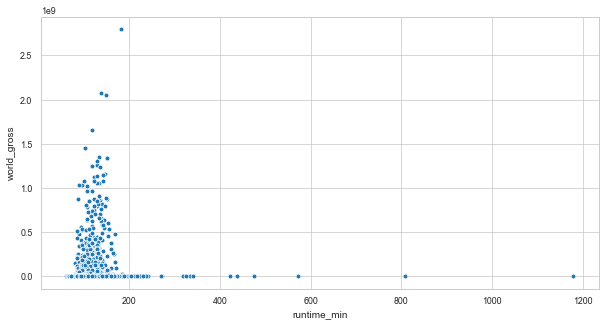

In [92]:
# runtime vs avg(gross_revenue)
plt.figure(figsize = (10,5))
bar_genre = sns.scatterplot(x = movie_df['runtime_min'], y = movie_df['world_gross'], data = movie_df)
bar_genre.set_yticklabels()
# bar_genre.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

Text(65.45, 0.5, 'Worldwide Gross')

<Figure size 720x432 with 0 Axes>

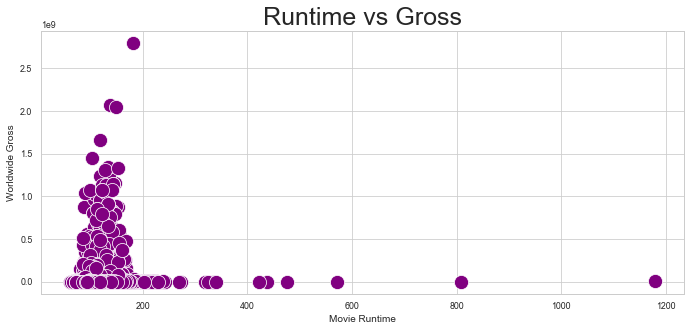

In [85]:
#format
plt.figure(figsize =(10,6)) 
sns.set_style("whitegrid")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":25,"axes.labelsize":10})
plt.tight_layout()
# plot
plt.figure(figsize = (10,5))
bar_time = sns.scatterplot(x = movie_df['runtime_min'], y = 'world_gross', data = movie_df, color = 'purple', s = 200)
# bar_time.set_xticklabels(bar_genre.get_xticklabels(), rotation=45, horizontalalignment='right')
#titles
plt.title('Runtime vs Gross')
plt.tight_layout()
plt.xlabel('Movie Runtime')
plt.ylabel('Worldwide Gross')

## Beginnings of Data Visualization ##


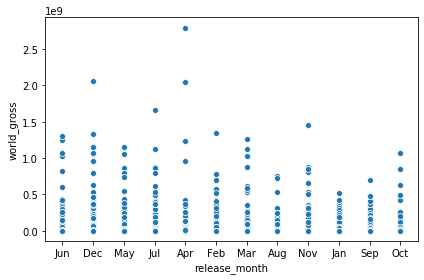

In [140]:
sns.scatterplot( x = movie_df['release_month'], y = movie_df['world_gross'], data = movie_df)
plt.tight_layout()

NameError: name 'bar_genre' is not defined

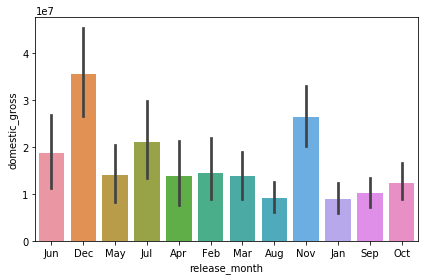

In [141]:
months = sns.barplot( x = movie_df['release_month'], y = movie_df['domestic_gross'], data = movie_df)
plt.tight_layout()
months = bar_genre.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
#vertical x axis needed

In [ ]:
'''factors:
    - want to make movie
    - which is profitable? why? (is there factors like days off?)
    - make hypothesis : people go to movies more in holiday season
    - strategy: 
        - selling something, recommending strategies
        - why do microsoft want to make movies? (over five years, gross is way higher in certain month)
        - recommendation! 
'''

## Question 3: What kind of movie has a higher return?  ##

Which genres have the higher revenues?


NameError: name 'chart' is not defined

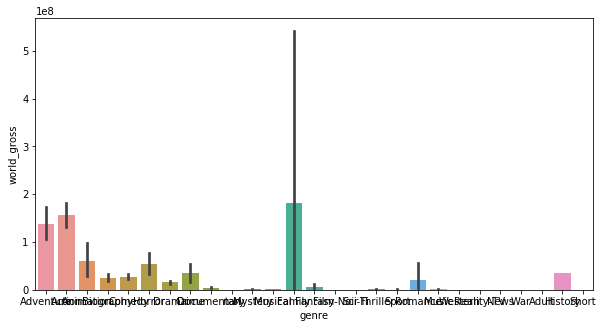

In [82]:
genre_df = movie_df.copy()
genre_df['genre'] = genre_df['genre_1']
genre_df[genre_df['genre'] == '[]'].dropna(axis = 0)

plt.figure(figsize = (10,5))
bar_genre = sns.barplot(x = genre_df['genre'], y = movie_df['world_gross'], data = movie_df)
bar_genre.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
#vertical x axis needed


In [ ]:
genre_df = movie_df.copy()
genre_df['genre'] = genre_df['genre_1']


plt.figure(figsize=(10,5))
chart = sns.countplot(
    data= genre_df,
    x= genre_df['genre'],
    palette='magma')

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [ ]:
sns.scatterplot(x = movie_df['genre_1'], y = movie_df['world_gross'], data = movie_df)

## Question 4: How much should we budget? ##

What budget produces the highest revenue?


In [145]:
budget_df = movie_df.copy()

In [146]:
budget_df.dropna(inplace = True)

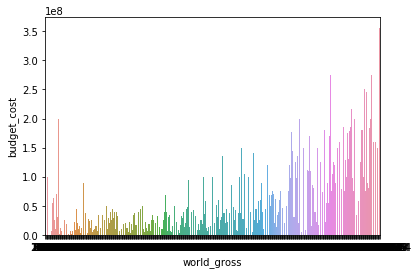

In [147]:
sns.barplot(x = budget_df['world_gross'], y = budget_df['budget_cost'], data = budget_df)

## Question 5: What rating we target? ##

What MPAA has the most Worldwide Gross? 

In [699]:
mpaa_df = movie_df.copy()
#mpaa_df.dropna(axis = 0, inplace = True)


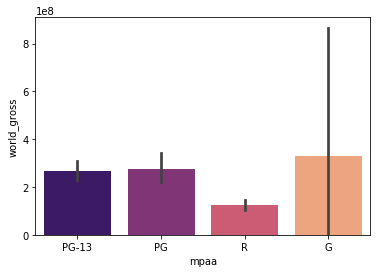

In [701]:
sns.barplot(x= mpaa_df['mpaa'], y = mpaa_df['world_gross'], data = mpaa_df, palette = 'magma')